# Gradient Boosting

This notebook shows the Gradient Boosting model for spambase data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [5]:
df = pd.read_csv("spambase.csv")

In [6]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))

scaled_features = scaler.transform(df.drop('class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


### Modelling

1. Split dataset into training and test set

In [8]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# Set up timer
t = Timer()

## Gradient Boosting

1. Default Gradient Boosting model

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
gbc_base = GradientBoostingClassifier(
    random_state=0
)
gbc_base.fit(X_train, y_train)
y_pred_gbc_base_train = gbc_base.predict(X_train)
y_pred_gbc_base_test = gbc_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_gbc_base_train)
precision_train = precision_score(y_train, y_pred_gbc_base_train)
recall_train = recall_score(y_train, y_pred_gbc_base_train)
f1_train = f1_score(y_train, y_pred_gbc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_gbc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_base_test)
precision_test = precision_score(y_test, y_pred_gbc_base_test)
recall_test = recall_score(y_test, y_pred_gbc_base_test)
f1_test = f1_score(y_test, y_pred_gbc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_gbc_base_test)

print(f"Train Accuracy of GBC: {accuracy_train:.3f}")
print(f"Train Precision of GBC: {precision_train:.3f}")
print(f"Train Recall of GBC: {recall_train:.3f}")
print(f"Train F1 of GBC: {f1_train:.3f}")
print(f"Train ROC of GBC: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of GBC: {accuracy_test:.3f}")
print(f"Test Precision of GBC: {precision_test:.3f}")
print(f"Test Recall of GBC: {recall_test:.3f}")
print(f"Test F1 of GBC: {f1_test:.3f}")
print(f"Test ROC of GBC: {roc_auc_test:.3f}")

Elapsed time: 0.7982 seconds
Train Accuracy of GBC: 0.963
Train Precision of GBC: 0.961
Train Recall of GBC: 0.942
Train F1 of GBC: 0.952
Train ROC of GBC: 0.959
---
Test Accuracy of GBC: 0.951
Test Precision of GBC: 0.954
Test Recall of GBC: 0.926
Test F1 of GBC: 0.940
Test ROC of GBC: 0.947


Use Cross Validation for default model

In [11]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
gbc_base_res_base = cross_validate(
      estimator=gbc_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 3.2046 seconds


Collect mean of all scores

In [12]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(gbc_base_res_base[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(gbc_base_res_base[m]):.3f}")

train_accuracy: 0.966
train_precision: 0.966
train_recall: 0.946
train_f1: 0.956
----
test_accuracy: 0.940
test_precision: 0.942
test_recall: 0.899
test_f1: 0.920


Plot learning curve of default GBC

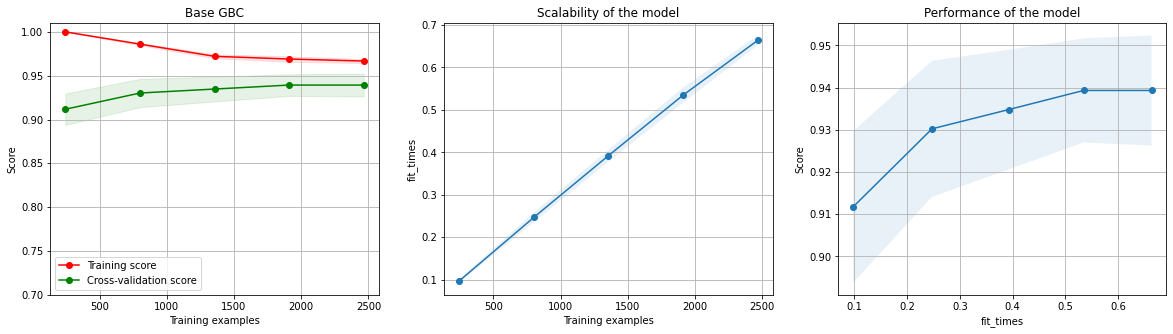

In [13]:
title = "Base GBC"
plot_learning_curve(
    gbc_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [14]:
y_pred_gbc_base_train = cross_val_predict(gbc_base, X_train, y_train, cv=5)
y_pred_gbc_base_test = cross_val_predict(gbc_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_gbc_base_train)
precision_train = precision_score(y_train, y_pred_gbc_base_train)
recall_train = recall_score(y_train, y_pred_gbc_base_train)
f1_train = f1_score(y_train, y_pred_gbc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_gbc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_base_test)
precision_test = precision_score(y_test, y_pred_gbc_base_test)
recall_test = recall_score(y_test, y_pred_gbc_base_test)
f1_test = f1_score(y_test, y_pred_gbc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_gbc_base_test)

print(f"Train Accuracy of GBC: {accuracy_train:.3f}")
print(f"Train Precision of GBC: {precision_train:.3f}")
print(f"Train Recall of GBC: {recall_train:.3f}")
print(f"Train F1 of GBC: {f1_train:.3f}")
print(f"Train ROC of GBC: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of GBC: {accuracy_test:.3f}")
print(f"Test Precision of GBC: {precision_test:.3f}")
print(f"Test Recall of GBC: {recall_test:.3f}")
print(f"Test F1 of GBC: {f1_test:.3f}")
print(f"Test ROC of GBC: {roc_auc_test:.3f}")

Train Accuracy of GBC: 0.940
Train Precision of GBC: 0.941
Train Recall of GBC: 0.899
Train F1 of GBC: 0.920
Train ROC of GBC: 0.932
---
Test Accuracy of GBC: 0.945
Test Precision of GBC: 0.948
Test Recall of GBC: 0.918
Test F1 of GBC: 0.933
Test ROC of GBC: 0.941


Perform pruning

I will try to tune the other hyperparameters to prune the model and score higher for the accuracy metrics

In [30]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    "max_depth": [1, 2, 3, 4],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "n_estimators": [25, 50, 75, 100, 125, 150]
}
gbc = GradientBoostingClassifier(random_state=0)
gbc_gs = GridSearchCV(gbc, parameter_space, n_jobs=-1, cv=5)
gbc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [25, 50, 75, 100, 125, 150]})

In [31]:
cv_results = pd.DataFrame(gbc_gs.cv_results_)

In [32]:
cv_results.sort_values(by="mean_test_score", ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,1.862595,0.052242,0.003787,0.002070,0.1,4,150,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.930308,0.948136,0.925325,0.967532,0.957792,0.945819,0.016005,1
65,1.432054,0.030907,0.003557,0.001691,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.925446,0.956240,0.928571,0.962662,0.951299,0.944844,0.015034,2
70,1.605721,0.059666,0.006227,0.002676,0.1,4,125,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.930308,0.946515,0.926948,0.964286,0.954545,0.944521,0.014184,3


In [33]:
cv_results.sort_values(by="mean_test_score", ascending=False).head(3)[["param_learning_rate", "param_max_depth", "param_n_estimators", "mean_test_score", "std_test_score"]]

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,std_test_score
71,0.1,4,150,0.945819,0.016005
65,0.1,3,150,0.944844,0.015034
70,0.1,4,125,0.944521,0.014184


Advanced model

In [61]:
t.start()
gbc_adv = GradientBoostingClassifier( 
    random_state=0, 
    n_estimators=150, 
    learning_rate=0.1,
    max_depth=4
)
gbc_adv.fit(X_train, y_train)
y_pred_gbc_adv_train = gbc_adv.predict(X_train)
y_pred_gbc_adv_test = gbc_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_gbc_adv_train)
precision_train = precision_score(y_train, y_pred_gbc_adv_train)
recall_train = recall_score(y_train, y_pred_gbc_adv_train)
f1_train = f1_score(y_train, y_pred_gbc_adv_train)
roc_train = roc_auc_score(y_train, y_pred_gbc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_adv_test)
precision_test = precision_score(y_test, y_pred_gbc_adv_test)
recall_test = recall_score(y_test, y_pred_gbc_adv_test)
f1_test = f1_score(y_test, y_pred_gbc_adv_test)
roc_test = roc_auc_score(y_test, y_pred_gbc_adv_test)

print(f"Train Accuracy of Adv GBC: {accuracy_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Adv GBC: {accuracy_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_test:.3f}")

Elapsed time: 1.5581 seconds
Train Accuracy of Adv GBC: 0.982
Train Precision of Adv GBC: 0.985
Train Recall of Adv GBC: 0.968
Train F1 of Adv GBC: 0.976
Train ROC of Adv GBC: 0.979
---
Test Accuracy of Adv GBC: 0.956
Test Precision of Adv GBC: 0.961
Test Recall of Adv GBC: 0.932
Test F1 of Adv GBC: 0.946
Test ROC of Adv GBC: 0.952


In [62]:
t.start()
gbc_adv_res = cross_validate(
      estimator=gbc_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 6.4236 seconds


In [63]:
for m in training_metrics:
    print(f"{m}: {np.mean(gbc_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(gbc_adv_res[m]):.3f}")

train_accuracy: 0.986
train_precision: 0.987
train_recall: 0.976
train_f1: 0.981
----
test_accuracy: 0.946
test_precision: 0.937
test_recall: 0.920
test_f1: 0.929


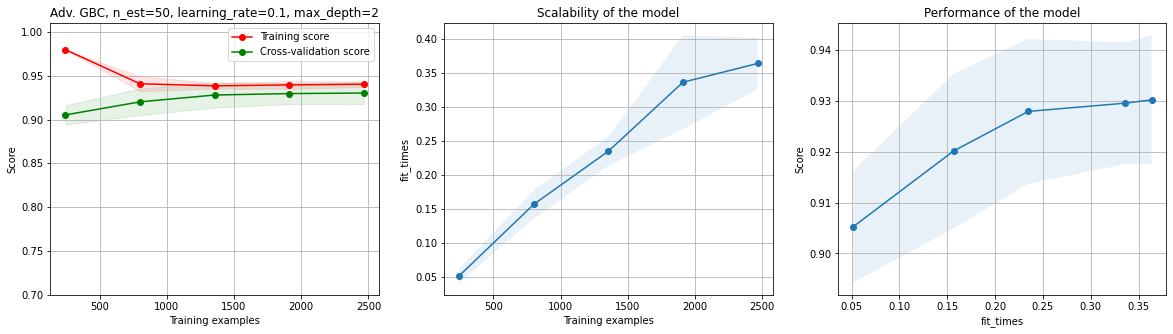

In [60]:
title = "Adv. GBC, n_est=50, learning_rate=0.1, max_depth=2"
plot_learning_curve(
    gbc_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1
)

plt.show()

In [57]:
y_pred_gbc_adv_train = cross_val_predict(gbc_adv, X_train, y_train, cv=5)
y_pred_gbc_adv_test = cross_val_predict(gbc_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_gbc_adv_train)
precision_train = precision_score(y_train, y_pred_gbc_adv_train)
recall_train = recall_score(y_train, y_pred_gbc_adv_train)
f1_train = f1_score(y_train, y_pred_gbc_adv_train)
roc_train = roc_auc_score(y_train, y_pred_gbc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_adv_test)
precision_test = precision_score(y_test, y_pred_gbc_adv_test)
recall_test = recall_score(y_test, y_pred_gbc_adv_test)
f1_test = f1_score(y_test, y_pred_gbc_adv_test)
roc_test = roc_auc_score(y_test, y_pred_gbc_adv_test)

print(f"Train Accuracy of Adv GBC: {accuracy_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Adv GBC: {accuracy_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_test:.3f}")

Train Accuracy of Adv GBC: 0.930
Train Precision of Adv GBC: 0.940
Train Recall of Adv GBC: 0.874
Train F1 of Adv GBC: 0.906
Train ROC of Adv GBC: 0.920
---
Test Accuracy of Adv GBC: 0.934
Test Precision of Adv GBC: 0.945
Test Recall of Adv GBC: 0.893
Test F1 of Adv GBC: 0.918
Test ROC of Adv GBC: 0.928


Final scores on test set

In [65]:
gbc_adv2 = GradientBoostingClassifier( 
    random_state=0, 
    n_estimators=50, 
    learning_rate=0.1,
    max_depth=2
)
gbc_adv2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=50, random_state=0)

In [66]:
y_pred_base_gbc_train_f = gbc_base.predict(X_train)
y_pred_adv_gbc_train_f = gbc_adv.predict(X_train)
y_pred_adv2_gbc_train_f = gbc_adv2.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_gbc_train_f)
precision_base_train = precision_score(y_train, y_pred_base_gbc_train_f)
recall_base_train = recall_score(y_train, y_pred_base_gbc_train_f)
f1_base_train = f1_score(y_train, y_pred_base_gbc_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_gbc_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_gbc_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_gbc_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_gbc_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_gbc_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_gbc_train_f)

accuracy_adv2_train = accuracy_score(y_train, y_pred_adv2_gbc_train_f)
precision_adv2_train = precision_score(y_train, y_pred_adv2_gbc_train_f)
recall_adv2_train = recall_score(y_train, y_pred_adv2_gbc_train_f)
f1_adv2_train = f1_score(y_train, y_pred_adv2_gbc_train_f)
roc_adv2_train = roc_auc_score(y_train, y_pred_adv2_gbc_train_f)

y_pred_base_gbc_test_f = gbc_base.predict(X_test)
y_pred_adv_gbc_test_f = gbc_adv.predict(X_test)
y_pred_adv2_gbc_test_f = gbc_adv2.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_gbc_test_f)
precision_base_test = precision_score(y_test, y_pred_base_gbc_test_f)
recall_base_test = recall_score(y_test, y_pred_base_gbc_test_f)
f1_base_test = f1_score(y_test, y_pred_base_gbc_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_gbc_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_gbc_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_gbc_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_gbc_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_gbc_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_gbc_test_f)

accuracy_adv2_test = accuracy_score(y_test, y_pred_adv2_gbc_test_f)
precision_adv2_test = precision_score(y_test, y_pred_adv2_gbc_test_f)
recall_adv2_test = recall_score(y_test, y_pred_adv2_gbc_test_f)
f1_adv2_test = f1_score(y_test, y_pred_adv2_gbc_test_f)
roc_adv2_test = roc_auc_score(y_test, y_pred_adv2_gbc_test_f)

In [67]:
print("Final - Base GBC")
print(f"Train Accuracy of Base GBC: {accuracy_base_train:.3f}")
print(f"Train Precision of Base GBC: {precision_base_train:.3f}")
print(f"Train Recall of Base GBC: {recall_base_train:.3f}")
print(f"Train F1 of Base GBC: {f1_base_train:.3f}")
print(f"Train ROC of Base GBC: {roc_base_train:.3f}")

print(f"Test Accuracy of Base GBC: {accuracy_base_test:.3f}")
print(f"Test Precision of Base GBC: {precision_base_test:.3f}")
print(f"Test Recall of Base GBC: {recall_base_test:.3f}")
print(f"Test F1 of Base GBC: {f1_base_test:.3f}")
print(f"Test ROC of Base GBC: {roc_base_test:.3f}")

print("Adv GBC")
print(f"Train Accuracy of Adv GBC: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_adv_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_adv_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_adv_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_adv_train:.3f}")

print(f"Test Accuracy of Adv GBC: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_adv_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_adv_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_adv_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_adv_test:.3f}")

print("---")

print("Adv2 GBC")
print(f"Train Accuracy of Adv2 GBC: {accuracy_adv2_train:.3f}")
print(f"Train Precision of Adv2 GBC: {precision_adv2_train:.3f}")
print(f"Train Recall of Adv2 GBC: {recall_adv2_train:.3f}")
print(f"Train F1 of Adv2 GBC: {f1_adv2_train:.3f}")
print(f"Train ROC of Adv2 GBC: {roc_adv2_train:.3f}")

print(f"Test Accuracy of Adv2 GBC: {accuracy_adv2_test:.3f}")
print(f"Test Precision of Adv2 GBC: {precision_adv2_test:.3f}")
print(f"Test Recall of Adv2 GBC: {recall_adv2_test:.3f}")
print(f"Test F1 of Adv2 GBC: {f1_adv2_test:.3f}")
print(f"Test ROC of Adv2 GBC: {roc_adv2_test:.3f}")

print("---")

Final - Base GBC
Train Accuracy of Base GBC: 0.963
Train Precision of Base GBC: 0.961
Train Recall of Base GBC: 0.942
Train F1 of Base GBC: 0.952
Train ROC of Base GBC: 0.959
Test Accuracy of Base GBC: 0.951
Test Precision of Base GBC: 0.954
Test Recall of Base GBC: 0.926
Test F1 of Base GBC: 0.940
Test ROC of Base GBC: 0.947
Adv GBC
Train Accuracy of Adv GBC: 0.982
Train Precision of Adv GBC: 0.985
Train Recall of Adv GBC: 0.968
Train F1 of Adv GBC: 0.976
Train ROC of Adv GBC: 0.979
Test Accuracy of Adv GBC: 0.956
Test Precision of Adv GBC: 0.961
Test Recall of Adv GBC: 0.932
Test F1 of Adv GBC: 0.946
Test ROC of Adv GBC: 0.952
---
Adv2 GBC
Train Accuracy of Adv2 GBC: 0.939
Train Precision of Adv2 GBC: 0.949
Train Recall of Adv2 GBC: 0.887
Train F1 of Adv2 GBC: 0.917
Train ROC of Adv2 GBC: 0.929
Test Accuracy of Adv2 GBC: 0.936
Test Precision of Adv2 GBC: 0.956
Test Recall of Adv2 GBC: 0.888
Test F1 of Adv2 GBC: 0.921
Test ROC of Adv2 GBC: 0.929
---


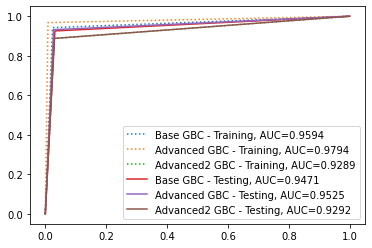

In [68]:
plt.figure(0).clf()

# Train
fpr, tpr, _ = roc_curve(y_train, y_pred_base_gbc_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_gbc_train_f), 4)
plt.plot(fpr,tpr,label="Base GBC - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_gbc_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_gbc_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced GBC - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_train, y_pred_adv2_gbc_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv2_gbc_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced2 GBC - Training, AUC="+str(auc), linestyle="dotted")

# Test
fpr, tpr, _ = roc_curve(y_test, y_pred_base_gbc_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_gbc_test_f), 4)
plt.plot(fpr,tpr,label="Base GBC - Testing, AUC="+str(auc), linestyle="solid")

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_gbc_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_gbc_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced GBC - Testing, AUC="+str(auc), linestyle="solid")

fpr, tpr, _ = roc_curve(y_test, y_pred_adv2_gbc_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv2_gbc_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced2 GBC - Testing, AUC="+str(auc), linestyle="solid")

plt.legend()